IMPORTS AND INSTALLS



In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import os
import csv

#SNSCRAPE LIBRARIES
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
! pip install -U textblob
! python -m textblob.download_corpora
!pip install pandas
!pip install wordcloud
!pip install plotly==5.3.1

#Data Preprocessing and Feature Engineering
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
import string

import re
import nltk
from bs4 import BeautifulSoup
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.express as pex

import urllib
import requests

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
pd.set_option("display.max_colwidth", -1)

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-00eo62xi
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-00eo62xi
ERROR: Package 'snscrape' requires a different Python: 3.7.12 not in '~=3.8'
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk

SCRAPING TWEETS USING SNSCRAPE LIBRARY, RAW JSON DATA

In [3]:
# tweet_count = 500
# text_query = "COVID-19 Vaccine"
# since_date = "2020-03-01"
# until_date = "2020-03-31"

# os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))

EDA, PREPROCESSING, CLEANING STEPS


CLEAN FUNCTION TO CLEAN THE TEXT USING REGULAR EXPRESSIONS 

In [4]:
# def clean_text(text):
#     text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
#     text_rc = re.sub('[0-9]+', '', text_lc)
#     tokens = re.split('\W+', text_rc)    # tokenization
#     text = [word for word in tokens if word not in final_stopword_list]  # remove stopwords and stemming
#     return text

In [5]:
# tweet_df['tweet_nonstop']=tweet_df['tweet_nonstop'].apply(lambda x: ' '.join(x))

TRYING OUT COUNT VECTORIZER 

In [6]:
# countVectorizer = CountVectorizer(analyzer=clean_text) 
# countVector = countVectorizer.fit_transform(tweet_df['content'])
# print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
# #print(countVectorizer.get_feature_names())

In [7]:
# count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
# #count_vect_df.sample(10)

FUNCTION TO EXTRACT N-GRAMS FROM TOKENIZED TEXT 

In [8]:
# import nltk
# from nltk.util import ngrams
# def extract_ngrams(data, num):
#     n_grams = ngrams(nltk.word_tokenize(data), num)
#     return [ ' '.join(grams) for grams in n_grams]
    
 
# data = ' '.join(tweet_df['tweet_nonstop'].tail(3000))

In [9]:
# print("4-gram: ", extract_ngrams(data, 4))



BI-GRAMS

In [10]:
# from collections import Counter

# a = extract_ngrams(data, 2)

# c = Counter(a)

# print(c.most_common(30))

In [11]:
# type(c.most_common(15)[0])

In [12]:
# aList = list(c.most_common(30))

In [13]:
# aList

ROLLING AVERAGE OF NLTK_SENTIMENT SCORE OVER THE PERIOD OF 18 MONTHS

In [14]:
# rolling_windows = tweet_df.rolling(100, min_periods=1)

# rolling_mean = rolling_windows.mean()

# print(rolling_mean)

In [15]:
# rolling_data=tweet_df['nltk_cmp_score'].rolling(200,min_periods=100).mean()

In [16]:
# rolling_data = rolling_data.iloc[100:]

In [17]:
# rolling_data.iplot()

In [18]:
# tweet_df['label']=tweet_df['nltk_sentiment']

BUCKETING NLTK_SENTIMENT SCORES INTO 2 CLASSES || 0-NEUTRAL SENTIMENT ||1-POSITIVE SENTIMENT || 2-NEGATIVE SENTIMENT ||


In [19]:
# tweet_df.loc[tweet_df['label'] == "Positive", 'label'] = 1


In [20]:
# tweet_df.loc[tweet_df['label'] == "Negative", 'label'] = 2


In [21]:
# tweet_df.loc[tweet_df['label'] == "Neutral", 'label'] = 0


In [22]:
# writer = pd.ExcelWriter('/Users/bindupriya/Desktop/Final-updated.xlsx')
# # write dataframe to excel
# tweet_df.to_excel(writer)
# # save the excel
# writer.save()

TRYING OUT TFIDF VECTORIZER NOW..

In [23]:
# vectorizer = TfidfVectorizer()

# X = vectorizer.fit_transform(tweet_df['tweet_nonstop'].values.astype('U'))


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df=pd.read_excel('/content/drive/MyDrive/final-updated data/Final-updated.xlsx')

In [26]:
df_predict=pd.read_excel('/content/drive/MyDrive/final-updated data/Final-updated.xlsx')

In [27]:
df_predictions_18k=df_predict[['tweet_nonstop','label']]
df_predictions_18k.shape

(18000, 2)

In [28]:
df_predictions_18k.dropna(inplace=True)

In [29]:
df_predictions_18k.shape

(17838, 2)

In [30]:
df

,Unnamed: 0,index,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,newcontent,nltk_scores,nltk_cmp_score,nltk_sentiment,tweet_punct,tweet_tokenized,tweet_nonstop,label
0,0,0,snscrape.modules.twitter.Tweet,https://twitter.com/purplgrl5/status/1244776302982451202,2020-03-30 23:59:32,"@g Also, there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll. You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated. So it is highly likely those","@g Also, there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll. You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated. So it is highly likely those",1244776302982450944,"{'_type': 'snscrape.modules.twitter.User', 'username': 'purplgrl5', 'id': 299169696, 'displayname': 'Mask it and Vax it!☮️🇺🇸⚾️👀🐶🐱', 'description': 'political junkie, Cubs fan, music & books keep me going. Retired RN. We must work to restore the political system that actually works 4 America. Right Matters!', 'rawDescription': 'political junkie, Cubs fan, music & books keep me going. Retired RN. We must work to restore the political system that actually works 4 America. Right Matters!', 'descriptionUrls': None, 'verified': False, 'created': '2011-05-15T16:37:02+00:00', 'followersCount': 105, 'friendsCount': 369, 'statusesCount': 5305, 'favouritesCount': 18626, 'listedCount': 0, 'mediaCount': 48, 'location': 'AR. aka Trumpfrikistan.', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1418791230398418949/i02aMq0I_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/299169696/1602771472', 'label': None, 'url': 'https://twitter.com/purplgrl5'}",0,0,1,0,1244459086902710016,en,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",http://twitter.com/#!/download/ipad,Twitter for iPad,NaN,NaN,NaN,NaN,NaN,1.244459e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'g', 'id': 17853751, 'displayname': 'Greg Leding', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/g'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'g', 'id': 17853751, 'displayname': 'Greg Leding', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/g'}]",NaN,NaN,NaN,NaN,also flu vaccine every year americans get contributes death toll sure people die complications flu mostly viral pneumonia like covid usually unvaccinated highly likely,"{'neg': 0.363, 'neu': 0.503, 'pos': 0.134, 'compound': -0.8481}",-0.8481,Negative,also flu vaccine every year americans get contributes death toll sure people die complications flu mostly viral pneumonia like covid usually unvaccinated highly likely,"['also', 'flu', 'vaccine', 'every', 'year', 'americans', 'get', 'contributes', 'death', 'toll', 'sure', 'people', 'die', 'complications', 'flu', 'mostly', 'viral', 'pneumonia', 'like', 'c

In [31]:
df2 = df[['tweet_nonstop','label']]


In [32]:
df3=df2.sample(5000)

In [33]:
df3.dropna(inplace=True)

In [34]:
new_df = dict(df3[['tweet_nonstop', 'label']].values)


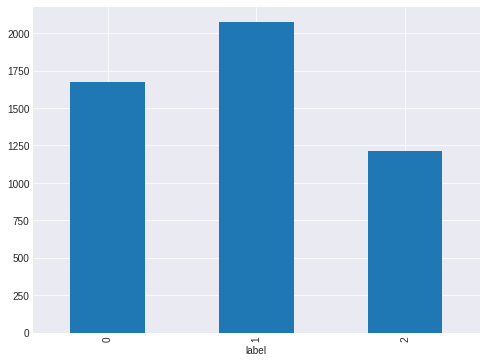

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df3.groupby('label').tweet_nonstop.count().plot.bar(ylim=0)
plt.show()

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
features = tfidf.fit_transform(df3.tweet_nonstop).toarray()
label = df3.label
features.shape

(4955, 6431)

In [37]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# from sklearn.feature_selection import chi2
# import numpy as np
# N = 2
# for i in sorted(label.items()):
#   features_chi2 = chi2(features, label == label)
#   indices = np.argsort(features_chi2[0])
#   feature_names = np.array(tfidf.get_feature_names())[indices]
#   unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#   bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#   print("# '{}':".format(i))
#   print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#   print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [39]:
# feature_names

In [40]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB

# X_train, X_test, y_train, y_test = train_test_split(df_predictions_18k['tweet_nonstop'], df_predictions_18k['label'], random_state = 0)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# clf = MultinomialNB().fit(X_train_tfidf, y_train)

# y_pred4 = clf.predict(count_vect.transform(X_test))

In [41]:
# y_pred4.shape

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df3['tweet_nonstop'], df3['label'], test_size=0.3, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [43]:
print(clf.predict(count_vect.transform(["also flu vaccine every year americans get contributes death toll sure people die complications flu mostly viral pneumonia like covid usually unvaccinated highly likely"])))

[2]


In [44]:
print(clf.predict(count_vect.transform(["fda food drug administration united states america stop using sharks use existing sustainable options sign petition"])))

[1]


In [45]:
print(clf.predict(count_vect.transform(["We did not get the vaccine yet because our neighbors got it and still got infected with virus nothing can be more hopeless than this"])))

[1]


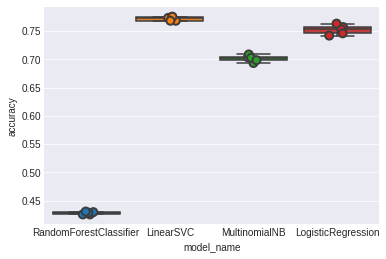

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, label, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [47]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.771746
LogisticRegression        0.751968
MultinomialNB             0.701110
RandomForestClassifier    0.428254
Name: accuracy, dtype: float64

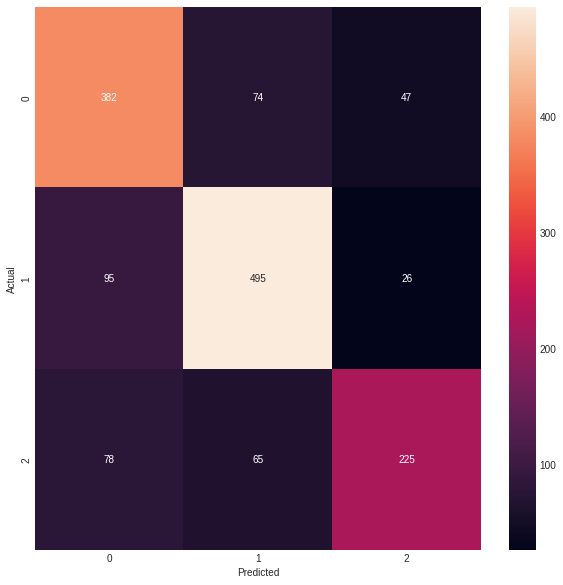

In [48]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, label, df3.index, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,  fmt='d', annot =True,
            xticklabels=[0,1,2], yticklabels=[0,1,2], ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       503
           1       0.78      0.80      0.79       616
           2       0.76      0.61      0.68       368

    accuracy                           0.74      1487
   macro avg       0.74      0.72      0.73      1487
weighted avg       0.74      0.74      0.74      1487



In [50]:
# # example of training a final classification model
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.datasets import make_blobs
# from sklearn.preprocessing import MinMaxScaler
# # generate 2d classification dataset
# X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# scalar = MinMaxScaler()
# scalar.fit(X)
# X = scalar.transform(X)
# # define and fit the final model
# model = Sequential()
# model.add(Dense(4, input_dim=2, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam')
# model.fit(X, y, epochs=200, verbose=0)


In [51]:
# # example making new class predictions for a classification problem
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.datasets import make_blobs
# from sklearn.preprocessing import MinMaxScaler
# # generate 2d classification dataset
# X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# scalar = MinMaxScaler()
# scalar.fit(X)
# X = scalar.transform(X)
# # define and fit the final model
# model = Sequential()
# model.add(Dense(4, input_dim=2, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam')
# model.fit(X, y, epochs=500, verbose=0)
# # new instances where we do not know the answer
# Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# Xnew = scalar.transform(Xnew)
# # make a prediction
# ynew = model.predict_classes(Xnew)
# # show the inputs and predicted outputs
# for i in range(len(Xnew)):
# 	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
